<a href="https://colab.research.google.com/github/anhhao04/NguyenAnhHao-20104006.github.io/blob/main/Nhaccu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Nhac_cu

/content/drive/MyDrive/Colab Notebooks/Nhac_cu


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Nhac_cu/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 500 images belonging to 10 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Nhac_cu/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 500 images belonging to 10 classes.


In [ ]:
x_train.class_indices

{'Sáo trúc': 0,
 'Song loan': 1,
 "Đàn T'rưng": 2,
 'Đàn bầu': 3,
 'Đàn cò': 4,
 'Đàn nguyệt': 5,
 'Đàn sến': 6,
 'Đàn tranh': 7,
 'Đàn tỳ bà': 8,
 'Đàn đáy': 9}

In [ ]:
validation.class_indices

{'Sáo trúc': 0,
 'Song loan': 1,
 "Đàn T'rưng": 2,
 'Đàn bầu': 3,
 'Đàn cò': 4,
 'Đàn nguyệt': 5,
 'Đàn sến': 6,
 'Đàn tranh': 7,
 'Đàn tỳ bà': 8,
 'Đàn đáy': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
16/16 [==============================] - 301s 19s/step - loss: 3.8623 - accuracy: 0.0760 - val_loss: 2.2907 - val_accuracy: 0.1000
Epoch 2/100
16/16 [==============================] - 13s 811ms/step - loss: 2.2899 - accuracy: 0.1280 - val_loss: 2.2195 - val_accuracy: 0.1440
Epoch 3/100
16/16 [==============================] - 12s 749ms/step - loss: 2.0640 - accuracy: 0.2640 - val_loss: 1.8603 - val_accuracy: 0.3700
Epoch 4/100
16/16 [==============================] - 11s 727ms/step - loss: 1.7715 - accuracy: 0.3920 - val_loss: 1.4575 - val_accuracy: 0.5080
Epoch 5/100
16/16 [==============================] - 11s 738ms/step - loss: 1.5318 - accuracy: 0.4760 - val_loss: 1.3420 - val_accuracy: 0.5560
Epoch 6/100
16/16 [==============================] - 11s 729ms/step - loss: 1.2508 - accuracy: 0.5920 - val_loss: 0.9470 - val_accuracy: 0.6820
Epoch 7/100
16/16 [==============================] - 11s 727ms/step - loss: 0.9803 - accuracy: 0.6540 - val_loss: 0.6803 - val_accuracy: 

In [ ]:
Score=model.evaluate(x_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.012072446756064892
Train Accuracy 0.9959999918937683


<function matplotlib.pyplot.show(*args, **kw)>

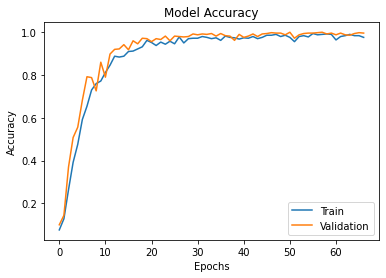

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Musical.h5")

In [ ]:
model_CNN=load_model('Musical.h5')

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/Nhac_cu/Test"

1/1 [==============================] - 0s 365ms/step
Đàn tranh


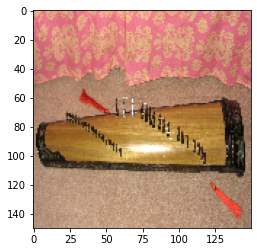

1/1 [==============================] - 0s 23ms/step
Đàn tỳ bà


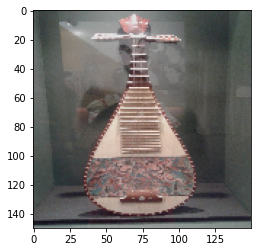

1/1 [==============================] - 0s 20ms/step
Sáo trúc


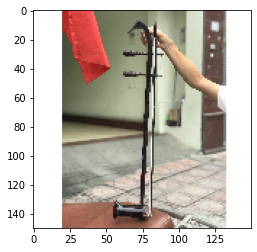

1/1 [==============================] - 0s 19ms/step
Đàn sến


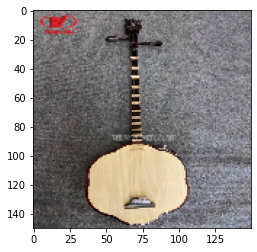

1/1 [==============================] - 0s 21ms/step
Sáo trúc


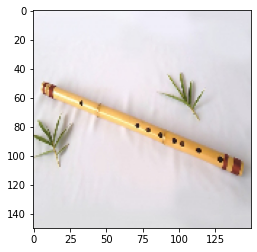

1/1 [==============================] - 0s 15ms/step
Song loan


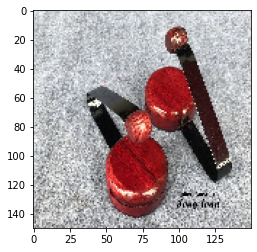

1/1 [==============================] - 0s 16ms/step
Đàn bầu


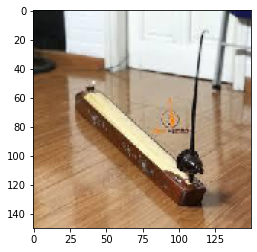

1/1 [==============================] - 0s 16ms/step
Đàn T'rưng


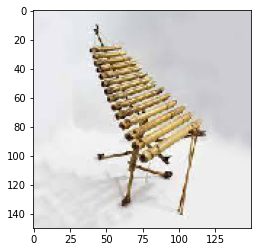

1/1 [==============================] - 0s 15ms/step
Đàn nguyệt


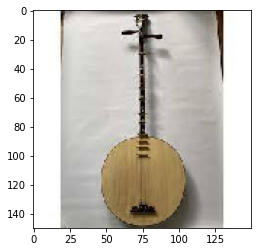

1/1 [==============================] - 0s 16ms/step
Đàn đáy


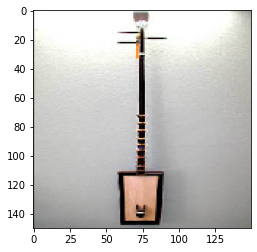

In [ ]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Sáo trúc'
  if round(result[0][1])==1:
    prediction='Song loan'
  if round(result[0][2])==1:
    prediction="Đàn T'rưng"
  if round(result[0][3])==1:
    prediction='Đàn bầu'
  if round(result[0][4])==1:
    prediction='Đàn cò'
  if round(result[0][5])==1:
    prediction='Đàn nguyệt'
  if round(result[0][6])==1:
    prediction='Đàn sến'
  if round(result[0][7])==1:
    prediction='Đàn tranh'
  if round(result[0][8])==1:
    prediction='Đàn tỳ bà'
  if round(result[0][9])==1:
    prediction='Đàn đáy'
  print(prediction)
  plt.show()